In [3]:
!pip install tensorflow

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [6]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
x_train=train_datagen.flow_from_directory(r"D:\Fertilizer\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [8]:
x_test=test_datagen.flow_from_directory(r'D:\Fertilizer\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set',target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 3416 images belonging to 9 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [10]:
model=Sequential()

In [11]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Flatten())

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [16]:
model.add(Dense(9,activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
len(x_train)

475

In [19]:
1238/24

51.583333333333336

In [20]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
475/475 [==============================] - 424s 887ms/step - loss: 1.2293 - accuracy: 0.6101 - val_loss: 0.8702 - val_accuracy: 0.6944
Epoch 2/10
475/475 [==============================] - 296s 623ms/step - loss: 0.5699 - accuracy: 0.7999 - val_loss: 0.5317 - val_accuracy: 0.8144
Epoch 3/10
475/475 [==============================] - 294s 619ms/step - loss: 0.4208 - accuracy: 0.8521 - val_loss: 0.3670 - val_accuracy: 0.8715
Epoch 4/10
475/475 [==============================] - 296s 622ms/step - loss: 0.3598 - accuracy: 0.8739 - val_loss: 0.3256 - val_accuracy: 0.8908
Epoch 5/10
475/475 [==============================] - 308s 649ms/step - loss: 0.3028 - accuracy: 0.8928 - val_loss: 0.2233 - val_accuracy: 0.9174
Epoch 6/10
475/475 [==============================] - 301s 634ms/step - loss: 0.2545 - accuracy: 0.9110 - val_loss: 0.2732 - val_accuracy: 0.9052
Epoch 7/10
475/475 [==============================] - 296s 623ms/step - loss: 0.2364 - accuracy: 0.9190 - val_loss: 0.2586 -

In [22]:
model.save('vegetable.h5')

In [23]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
img=image.load_img(r"D:\Fertilizer\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___Bacterial_spot\ae645b07-4c93-45d7-9ee6-83cbf1201e8b___NREC_B.Spot 9119.jpg",target_size=(128,128))

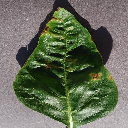

In [30]:
img

In [31]:
x=image.img_to_array(img)

In [32]:
x

array([[[114., 102., 106.],
        [124., 112., 116.],
        [140., 128., 132.],
        ...,
        [114., 102., 104.],
        [129., 117., 119.],
        [136., 124., 126.]],

       [[117., 105., 109.],
        [ 93.,  81.,  85.],
        [118., 106., 110.],
        ...,
        [ 93.,  81.,  83.],
        [135., 123., 125.],
        [109.,  97.,  99.]],

       [[123., 111., 115.],
        [125., 113., 117.],
        [100.,  88.,  92.],
        ...,
        [130., 118., 120.],
        [128., 116., 118.],
        [106.,  94.,  96.]],

       ...,

       [[178., 172., 176.],
        [171., 165., 169.],
        [172., 166., 170.],
        ...,
        [205., 199., 201.],
        [183., 177., 179.],
        [194., 188., 190.]],

       [[194., 188., 192.],
        [182., 176., 180.],
        [185., 179., 183.],
        ...,
        [194., 188., 190.],
        [180., 174., 176.],
        [190., 184., 186.]],

       [[189., 183., 187.],
        [180., 174., 178.],
        [176., 1

In [33]:
x=np.expand_dims(x,axis=0)

In [34]:
x

array([[[[114., 102., 106.],
         [124., 112., 116.],
         [140., 128., 132.],
         ...,
         [114., 102., 104.],
         [129., 117., 119.],
         [136., 124., 126.]],

        [[117., 105., 109.],
         [ 93.,  81.,  85.],
         [118., 106., 110.],
         ...,
         [ 93.,  81.,  83.],
         [135., 123., 125.],
         [109.,  97.,  99.]],

        [[123., 111., 115.],
         [125., 113., 117.],
         [100.,  88.,  92.],
         ...,
         [130., 118., 120.],
         [128., 116., 118.],
         [106.,  94.,  96.]],

        ...,

        [[178., 172., 176.],
         [171., 165., 169.],
         [172., 166., 170.],
         ...,
         [205., 199., 201.],
         [183., 177., 179.],
         [194., 188., 190.]],

        [[194., 188., 192.],
         [182., 176., 180.],
         [185., 179., 183.],
         ...,
         [194., 188., 190.],
         [180., 174., 176.],
         [190., 184., 186.]],

        [[189., 183., 187.],
       

In [35]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 253ms/step


In [36]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [38]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [40]:
img=image.load_img(r"D:\Fertilizer\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___Bacterial_spot\ae645b07-4c93-45d7-9ee6-83cbf1201e8b___NREC_B.Spot 9119.jpg",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 40ms/step


'Pepper,_bell___healthy'